In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.constants
import scipy.sparse
import scipy.sparse.linalg
import numpy as np
from IPython.display import display

In [2]:
n = 100 # number of grid points
m = 1
w = 1
mu_b = 1
B = 1
a = 5
h_bar = 1
l_so = 1

# testing:
l_so_range = [2, 2, 4]
B_range = [0, 1, 10]

l_so = l_so_range[2]
B = B_range[2]

In [3]:
x = np.ogrid[-a:a:(n)*1j]

In [4]:
V = .5*m*w**2 * x**2

In [5]:
T_0 = h_bar**2 /(2*m) * 0.5*((n+1)/(2*a))**2 *sp.sparse.diags([-2 * np.ones(n), -1 * np.ones(n - 1), -1 * np.ones(n - 1)], [0, -1, 1], format='dok')

In [6]:
T = (T_0 + sp.sparse.diags(V, 0, format='dok')).todia()

In [7]:
E_T, psi_T = sp.sparse.linalg.eigsh(T, which = 'SA', k = 3, ncv=n) 

In [8]:
E_T

array([-101.64962324, -100.92950912, -100.2106755 ])

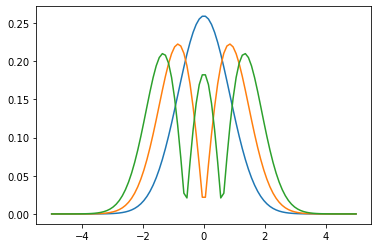

In [9]:
plt.plot(x, np.abs(psi_T))

In [10]:
cosine = mu_b * B * sp.sparse.diags(np.cos(2 * x / l_so), 0, format = 'dok')
sine = -1 * mu_b * B * sp.sparse.diags(np.sin(2 * x / l_so), 0, format = 'dok')

In [11]:
unity = sp.sparse.diags([1, 1], 0, format = 'dok')
sigma_z = sp.sparse.diags([1, -1], 0, format = 'dok')
sigma_x = sp.sparse.diags([1, 1], [-1, 1], format = 'dok')

In [12]:
H = sp.sparse.kron(T, unity) + sp.sparse.kron(cosine, sigma_z) + sp.sparse.kron(sine, sigma_x)

In [13]:
# E_H, psi_H = np.linalg.eigh(H.toarray())
E_H, psi_H = sp.sparse.linalg.eigsh(H, which = 'SA', k = 2*n-2, ncv=2*n) 

In [14]:
args = np.argsort(E_H)
E_H = E_H[args]
psi_H = psi_H[:, args]
E_H = E_H[:100]
psi_H = psi_H[:, :100]
E_H[:10]

array([-111.63398252, -110.91514662, -110.19757855, -109.48128178,
       -108.76625982, -108.05251621, -107.34005445, -106.62887761,
       -105.91898616, -105.21036754])

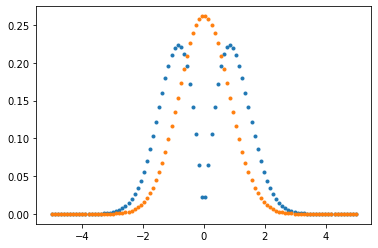

In [15]:
plt.scatter(x, np.abs(psi_H[:, 0][::2] / np.sqrt(np.abs(np.dot(psi_H[:, 0][::2].T.conjugate(), psi_H[:, 0][::2])))), marker='.', color = 'C0')
plt.scatter(x, np.abs(psi_H[:, 0][1::2] / np.sqrt(np.abs(np.dot(psi_H[:, 0][1::2].T.conjugate(), psi_H[:, 0][1::2])))), marker='.', color = 'C1')

In [16]:
eigenfuncts_even = []
eigenfuncts_odd = []
for i in range(psi_H.shape[1]):
    eigenfuncts_even.append(psi_H[:, i][::2])
    eigenfuncts_odd.append(psi_H[:, i][1::2])
    
temp = []
for eigenfunct in eigenfuncts_even:
    temp_1 = np.zeros(psi_H.shape[0], dtype = np.complex64)
    for i in range(len(eigenfunct)):
        temp_1[2*i] = eigenfunct[i]
    temp.append(temp_1)
eigenfuncts_even = temp

temp = []
for eigenfunct in eigenfuncts_odd:
    temp_1 = np.zeros(psi_H.shape[0], dtype = np.complex64)
    for i in range(len(eigenfunct)):
        temp_1[2*i + 1] = eigenfunct[i]
    temp.append(temp_1)
eigenfuncts_odd = temp
    
eigenfuncts = eigenfuncts_even + eigenfuncts_odd

# normalize sub-eigenfuncts:
temp = []
for eigenfunct in eigenfuncts:
    temp.append(eigenfunct / np.sqrt(np.abs(np.dot(eigenfunct.T.conjugate(), eigenfunct))))
eigenfuncts = temp
    
eigenvalues = []
for eigenfunct in eigenfuncts:
    temp = np.dot(H.toarray(), eigenfunct)
    temp = np.dot(eigenfunct.T.conjugate(), temp)
    eigenvalues.append(np.real(temp))
    
for i in range(len(eigenfuncts)):
    eigenfuncts[i] = np.delete(np.array(eigenfuncts[i]), np.where(np.array(eigenfuncts[i]) == 0))
    
eigenvalues = np.array(eigenvalues)
eigenfuncts = np.array(eigenfuncts, dtype = 'object')

args = np.argsort(eigenvalues)
eigenvalues = eigenvalues[args]
eigenfuncts = eigenfuncts[args]

In [17]:
eigenvalues[:10]

array([-111.2275363 , -109.68339482, -109.64611092, -108.50964281,
       -108.21999424, -106.83371715, -106.76702233, -105.52105845,
       -104.99360992, -104.27839021])

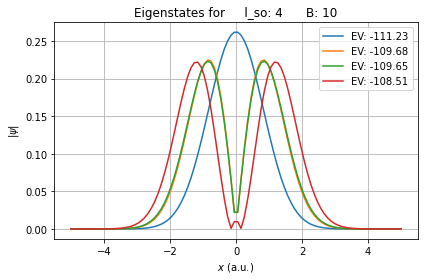

In [18]:
for i in range(eigenfuncts[0].shape[0])[:4]:
    plt.plot(x, np.abs(eigenfuncts[:][i]), label = f'EV: {np.around(eigenvalues[i], decimals=2)}')
plt.legend()
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$|\psi|$')
plt.title(f'Eigenstates for     l_so: {l_so}      B: {B}')
plt.grid()
plt.tight_layout()
plt.savefig(f'CoMa_5_14_b_lso_{l_so}_B_{B}.pdf')